In [2]:
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.manifold import TSNE

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

from models import *
from utils import *
from datasets import *

# 20231016

purpose: train UMAP to learn t-SNE layout

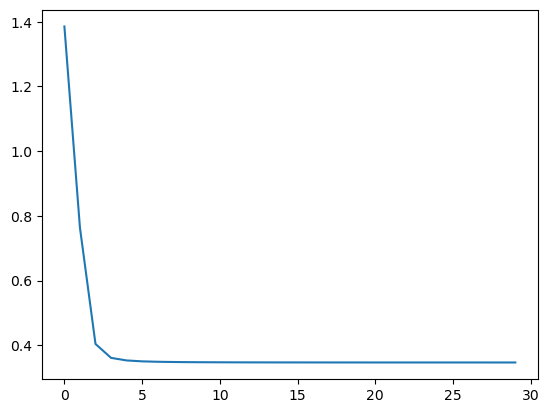

In [2]:
# II-1
train_losses = torch.load("./results/231016234028_II_1/train_losses_II_1.pt")
plt.plot(train_losses)

In [8]:
# I-1
train_losses = torch.load("./results/231017152222_I_1/train_losses_I_1.pt")
eval_losses = torch.load("./results/231017152222_I_1/eval_losses_I_1.pt")
train_losses, eval_losses

(tensor([[0.4626, 0.1158, 0.3468]], dtype=torch.float64),
 tensor([[0.5104, 0.1636, 0.3468]], dtype=torch.float64))